In [11]:
# 必要ライブラリのインポート

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#import japanize_matplotlib
from IPython.display import display

In [12]:
# torch関連ライブラリのインポート

import torch
import torch.nn as nn
import torch.optim as optim
from torchinfo import summary
from torchviz import make_dot

In [13]:
# 学習用データ準備

# ライブラリのインポート
from sklearn.datasets import load_iris

# データ読み込み
iris = load_iris()

# 入力データと正解データ取得
x_org, y_org = iris.data, iris.target

# 結果確認
print('元データ', x_org.shape, y_org.shape)

元データ (150, 4) (150,)


In [14]:
# データの絞り込み

# 入力データに関しては、sepal(切片０)length(0) と petal（花弁）length(2) のみ抽出
x_select = x_org[:,[0, 2]]

# 結果確認
print('元データ', x_select.shape, y_org.shape)

元データ (150, 2) (150,)


In [15]:
# 訓練データ、検証データに分割（シャッフルも同時に実施）

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x_select, y_org, train_size=75, test_size=75,
    random_state=123)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(75, 2) (75, 2) (75,) (75,)


In [16]:
# データを正解値ごとに分割

x_t0 = x_train[y_train == 0]
x_t1 = x_train[y_train == 1]
x_t2 = x_train[y_train == 2]

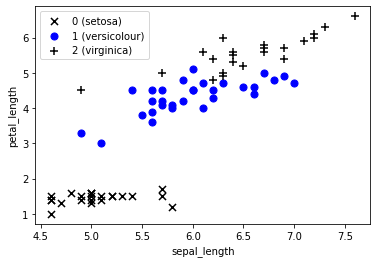

In [17]:
# 散布図の表示

plt.scatter(x_t0[:,0], x_t0[:,1], marker='x', c='k', s=50, label='0 (setosa)')
plt.scatter(x_t1[:,0], x_t1[:,1], marker='o', c='b', s=50, label='1 (versicolour)')
plt.scatter(x_t2[:,0], x_t2[:,1], marker='+', c='k', s=50, label='2 (virginica)')
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.legend()
plt.show()

In [18]:
print(x_train[0])
print(y_train[0])


[6.3 4.7]
1


In [19]:
# 学習用パラメータ設定

# 入力次元数
n_input = x_train.shape[1]

# 出力次元数
# 分類先クラス数　今回は３
n_output = len(list(set(y_train)))

# 結果確認
print(f'n_input: {n_input} n_output: {n_output}')

n_input: 2 n_output: 3


In [20]:
# モデル定義
# 2入力3出力のロジスティック回帰モデル

class Net(nn.Module):
    def __init__(self, n_input, n_output):
        super().__init__()
        self.l1 = nn.Linear(n_input, n_output)
        
        # 初期値を全部１にする
        self.l1.weight.data.fill_(1.0)
        self.l1.bias.data.fill_(1.0)
    
    def forward(self, x):
        x1 = self.l1(x)
        return x1
    
# インスタンスの生成
net = Net(n_input, n_output)

In [21]:
#モデル内のパラメータの確認
#l1.weightが行列に、l1.biasがベクトルになったいる

for parameter in net.named_parameters():
    print(parameter)

('l1.weight', Parameter containing:
tensor([[1., 1.],
        [1., 1.],
        [1., 1.]], requires_grad=True))
('l1.bias', Parameter containing:
tensor([1., 1., 1.], requires_grad=True))


In [22]:
#損失関数
criterion = nn.CrossEntropyLoss()

# 学習率
lr = 0.01

# 最適化関数
optimizer = optim.SGD(net.parameters(), lr=lr)

In [23]:
#入力データx_trainと正解データy_train のテンソル変数化

inputs = torch.tensor(x_train).float()
labels = torch.tensor(y_train).long()

inputs_test = torch.tensor(x_test).float()
labels_test = torch.tensor(y_test).long()

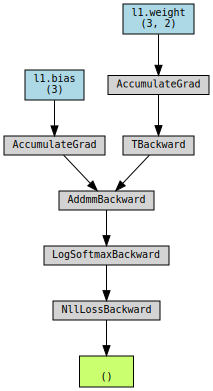

In [25]:
# 予測計算
outputs = net(inputs)

#損失計算
loss = criterion(outputs, labels)

#損失の計算グラフ化
g = make_dot(loss, params=dict(net.named_parameters()))
display(g)

In [26]:
#torch.max関数呼び出し
#２つめの引数は軸を意味している。１だと行ごとの計算

print(torch.max(outputs, 1))

torch.return_types.max(
values=tensor([12.0000, 12.7000,  7.6000, 13.0000, 12.3000,  7.6000,  7.3000, 11.1000,
        12.1000, 13.3000,  8.0000,  7.0000, 10.3000,  7.6000, 11.7000, 13.3000,
         7.4000, 13.5000,  8.2000,  8.4000, 12.7000,  6.6000,  7.9000, 12.2000,
        14.6000, 12.0000, 10.2000, 10.5000,  7.1000,  7.3000, 12.6000, 12.7000,
         7.4000,  7.7000, 10.8000, 11.5000, 11.5000, 14.0000, 12.8000, 10.8000,
        10.8000, 15.2000,  7.5000,  7.8000, 11.1000, 13.6000, 12.9000, 14.2000,
        12.7000,  7.6000, 10.9000,  7.0000, 10.9000, 11.2000,  7.4000, 11.7000,
        13.3000, 11.5000, 13.4000, 12.7000,  7.7000, 11.8000,  7.0000, 12.6000,
        11.7000, 10.9000,  9.2000, 12.2000, 10.4000, 12.1000,  7.5000,  9.1000,
        11.1000, 12.0000, 14.3000], grad_fn=<MaxBackward0>),
indices=tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 

In [28]:
#予測データのリストを取得
torch.max(outputs, 1)[1]

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0])

In [35]:
# 学習率
lr = 0.01

# 初期化
net = Net(n_input, n_output)

# 損失関数： 交差エントロピー関数
criterion = nn.CrossEntropyLoss()

# 最適化関数: 勾配降下法
optimizer = optim.SGD(net.parameters(), lr=lr)

# 繰り返し回数
num_epochs = 10000

# 評価結果記録用
history = np.zeros((0,5))

In [ ]:
# 学習率
lr = 0.01

# 初期化
net = Net(n_input, n_output)

# 損失関数： 交差エントロピー関数
criterion = nn.CrossEntropyLoss()

# 最適化関数: 勾配降下法
optimizer = optim.SGD(net.parameters(), lr=lr)

# 繰り返し回数
num_epochs = 10000

# 評価結果記録用
history = np.zeros((0,5))
# 繰り返し計算メインループ

for epoch in range(num_epochs):

    # 訓練フェーズ
    
    #勾配の初期化
    optimizer.zero_grad()

    # 予測計算
    outputs = net(inputs)

    # 損失計算
    loss = criterion(outputs, labels)

    # 勾配計算
    loss.backward()
    
    # パラメータ修正
    optimizer.step()

    # 予測ラベル算出
    predicted = torch.max(outputs, 1)[1]

    # 損失と精度の計算
    train_loss = loss.item()
    train_acc = (predicted == labels).sum()  / len(labels)

    #予測フェーズ

    # 予測計算
    outputs_test = net(inputs_test)

    # 損失計算
    loss_test = criterion(outputs_test, labels_test)

    # 予測ラベル算出
    predicted_test = torch.max(outputs_test, 1)[1]

    # 損失と精度の計算
    val_loss =  loss_test.item()
    val_acc =  (predicted_test == labels_test).sum() / len(labels_test)
    
    if ((epoch) % 10 == 0):
        print (f'Epoch [{epoch}/{num_epochs}], loss: {train_loss:.5f} acc: {train_acc:.5f} val_loss: {val_loss:.5f}, val_acc: {val_acc:.5f}')
        item = np.array([epoch, train_loss, train_acc, val_loss, val_acc])
        history = np.vstack((history, item))

Epoch [0/10000], loss: 1.09861 acc: 0.30667 val_loss: 1.09263, val_acc: 0.26667
Epoch [10/10000], loss: 1.03580 acc: 0.40000 val_loss: 1.06403, val_acc: 0.26667
Epoch [20/10000], loss: 1.00477 acc: 0.40000 val_loss: 1.03347, val_acc: 0.26667
Epoch [30/10000], loss: 0.97672 acc: 0.40000 val_loss: 1.00264, val_acc: 0.26667
Epoch [40/10000], loss: 0.95057 acc: 0.41333 val_loss: 0.97351, val_acc: 0.26667
Epoch [50/10000], loss: 0.92616 acc: 0.48000 val_loss: 0.94631, val_acc: 0.38667
Epoch [60/10000], loss: 0.90338 acc: 0.69333 val_loss: 0.92098, val_acc: 0.56000
Epoch [70/10000], loss: 0.88212 acc: 0.70667 val_loss: 0.89740, val_acc: 0.60000
Epoch [80/10000], loss: 0.86227 acc: 0.70667 val_loss: 0.87545, val_acc: 0.61333
Epoch [90/10000], loss: 0.84373 acc: 0.70667 val_loss: 0.85500, val_acc: 0.62667
Epoch [100/10000], loss: 0.82640 acc: 0.70667 val_loss: 0.83594, val_acc: 0.62667
Epoch [110/10000], loss: 0.81019 acc: 0.72000 val_loss: 0.81815, val_acc: 0.62667
Epoch [120/10000], loss: 0.

Epoch [1390/10000], loss: 0.41320 acc: 0.89333 val_loss: 0.39951, val_acc: 0.93333
Epoch [1400/10000], loss: 0.41231 acc: 0.89333 val_loss: 0.39861, val_acc: 0.93333
Epoch [1410/10000], loss: 0.41143 acc: 0.89333 val_loss: 0.39773, val_acc: 0.93333
Epoch [1420/10000], loss: 0.41055 acc: 0.89333 val_loss: 0.39685, val_acc: 0.93333
Epoch [1430/10000], loss: 0.40968 acc: 0.89333 val_loss: 0.39597, val_acc: 0.93333
Epoch [1440/10000], loss: 0.40882 acc: 0.89333 val_loss: 0.39510, val_acc: 0.93333
Epoch [1450/10000], loss: 0.40796 acc: 0.89333 val_loss: 0.39424, val_acc: 0.93333
Epoch [1460/10000], loss: 0.40711 acc: 0.89333 val_loss: 0.39339, val_acc: 0.93333
Epoch [1470/10000], loss: 0.40627 acc: 0.89333 val_loss: 0.39254, val_acc: 0.93333
Epoch [1480/10000], loss: 0.40543 acc: 0.90667 val_loss: 0.39170, val_acc: 0.93333
Epoch [1490/10000], loss: 0.40460 acc: 0.90667 val_loss: 0.39086, val_acc: 0.93333
Epoch [1500/10000], loss: 0.40378 acc: 0.90667 val_loss: 0.39003, val_acc: 0.93333
Epoc

Epoch [2800/10000], loss: 0.32916 acc: 0.90667 val_loss: 0.31500, val_acc: 0.94667
Epoch [2810/10000], loss: 0.32876 acc: 0.90667 val_loss: 0.31460, val_acc: 0.94667
Epoch [2820/10000], loss: 0.32835 acc: 0.90667 val_loss: 0.31419, val_acc: 0.94667
Epoch [2830/10000], loss: 0.32795 acc: 0.90667 val_loss: 0.31378, val_acc: 0.94667
Epoch [2840/10000], loss: 0.32755 acc: 0.90667 val_loss: 0.31338, val_acc: 0.94667
Epoch [2850/10000], loss: 0.32715 acc: 0.90667 val_loss: 0.31297, val_acc: 0.94667
Epoch [2860/10000], loss: 0.32675 acc: 0.90667 val_loss: 0.31257, val_acc: 0.94667
Epoch [2870/10000], loss: 0.32636 acc: 0.90667 val_loss: 0.31217, val_acc: 0.94667
Epoch [2880/10000], loss: 0.32597 acc: 0.90667 val_loss: 0.31178, val_acc: 0.94667
Epoch [2890/10000], loss: 0.32557 acc: 0.90667 val_loss: 0.31138, val_acc: 0.94667
Epoch [2900/10000], loss: 0.32518 acc: 0.90667 val_loss: 0.31099, val_acc: 0.94667
Epoch [2910/10000], loss: 0.32480 acc: 0.90667 val_loss: 0.31060, val_acc: 0.94667
Epoc

In [ ]:
#損失と精度の確認

print(f'初期状態: 損失: {history[0,3]:.5f} 精度: {history[0,4]:.5f}' )
print(f'最終状態: 損失: {history[-1,3]:.5f} 精度: {history[-1,4]:.5f}' )

In [ ]:
# 学習曲線の表示 (損失)

plt.plot(history[:,0], history[:,1], 'b', label='訓練')
plt.plot(history[:,0], history[:,3], 'k', label='検証')
plt.xlabel('繰り返し回数')
plt.ylabel('損失')
plt.title('学習曲線(損失)')
plt.legend()
plt.show()

In [ ]:
# 学習曲線の表示 (精度)

plt.plot(history[:,0], history[:,2], 'b', label='訓練')
plt.plot(history[:,0], history[:,4], 'k', label='検証')
plt.xlabel('繰り返し回数')
plt.ylabel('精度')
plt.title('学習曲線(精度)')
plt.legend()
plt.show()